## Modelo predictivo de erupciones volcánicas

Objetivo.

El objetivo del reto será realizar un modelo predictivo basado en Random Forests que permita conocer el tipo de erupción que tendrá un volcán en función de las vibraciones medidas por los sensores.

Una vez se haya hecho y entrenado el modelo predictivo, este se tendrá que emplear con los features del dataset de testing 'jm_test_X.csv'. Estas predicciones se tendrán que entregar en formato csv como en el ejemplo. Donde tendrá que aparecer tan solo una columna en la que en la primera fila sea un texto cualquiera y las predicciones empiecen en la fila 2.

La calidad de la predicción se medirá a partir del f1-score (macro).

In [2]:
import pandas as pd
data_train = pd.read_csv('data/jm_train.csv', sep=',')
data_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [58]:
data_test = pd.read_csv('data/jm_X_test.csv', sep=',')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  900 non-null    float64
 1   feature2  900 non-null    float64
 2   feature3  900 non-null    float64
 3   feature4  900 non-null    float64
 4   feature5  900 non-null    float64
 5   feature6  900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


In [10]:
#Valores

X = data_train.values
print(X)
target = data_train['target']
target

[[ 0.4743345   0.88164019 -2.05054338 ... -1.03515065 -1.93436702
   4.        ]
 [-1.03467542  1.74180079 -1.66062856 ... -0.33755256 -2.47383757
   0.        ]
 [-0.56322117 -0.68838088 -0.3184154  ...  0.35236635 -0.9129284
   1.        ]
 ...
 [-0.84759322  1.53857397  0.96240936 ...  0.3799345   0.73790732
   3.        ]
 [ 1.47243722  1.18769511  1.01576636 ...  1.58672237  0.18256889
   4.        ]
 [-0.08348882 -1.19478424 -0.38920423 ...  0.38241318 -0.90023708
   3.        ]]


0       4
1       0
2       1
3       3
4       0
       ..
2095    0
2096    1
2097    3
2098    4
2099    3
Name: target, Length: 2100, dtype: int64

In [11]:
Y = target.values
print(Y)

[4 0 1 ... 3 4 3]


In [12]:
pliniana = 0
peleana = 0
vulcaniana = 0
hawaiana = 0
estromboliana = 0

for value in Y:
    if value == 0:
        pliniana += 1
    elif value == 1:
        peleana += 1
    elif value == 2:
        vulcaniana += 1
    elif value == 3:
        hawaiana += 1
    elif value == 4:
        estromboliana += 1
    else:
        print('sin valor')

print("Número de erupciones en el modelo: ")
print(f"plinianas = {pliniana}")
print(f"peleanas = {peleana}")
print(f"vulcanianas = {vulcaniana}")
print(f"hawaianas = {hawaiana}")
print(f"estromboilianas = {estromboliana}")
        

Número de erupciones en el modelo: 
plinianas = 427
peleanas = 423
vulcanianas = 419
hawaianas = 426
estromboilianas = 405


In [14]:
!pip install imblearn

     |████████████████████████████████| 189 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 28.6 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [16]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler()
smote = SMOTE()

### Sobremuestreo con RandomOverSampler

In [17]:
dataRos, targetRos = ros.fit_resample(data_train, target)

In [18]:
targetRos

0       4
1       0
2       1
3       3
4       0
       ..
2130    4
2131    4
2132    4
2133    4
2134    4
Name: target, Length: 2135, dtype: int64

In [19]:
pliniana = 0
peleana = 0
vulcaniana = 0
hawaiana = 0
estromboliana = 0

YRos = targetRos.values

for value in YRos:
    if value == 0:
        pliniana += 1
    elif value == 1:
        peleana += 1
    elif value == 2:
        vulcaniana += 1
    elif value == 3:
        hawaiana += 1
    elif value == 4:
        estromboliana += 1
    else:
        print('sin valor')

print("Número de erupciones en el modelo: ")
print(f"plinianas = {pliniana}")
print(f"peleanas = {peleana}")
print(f"vulcanianas = {vulcaniana}")
print(f"hawaianas = {hawaiana}")
print(f"estromboilianas = {estromboliana}")

Número de erupciones en el modelo: 
plinianas = 427
peleanas = 427
vulcanianas = 427
hawaianas = 427
estromboilianas = 427


### Sobremuestreo con SMote

In [22]:
dataSmote, targetSmote = smote.fit_resample(data_train, target)
pliniana_smote = 0
peleana_smote = 0
vulcaniana_smote = 0
hawaiana_smote = 0
estromboliana_smote = 0

YSmote = targetSmote.values

for value in YSmote:
    if value == 0:
        pliniana_smote += 1
    elif value == 1:
        peleana_smote += 1
    elif value == 2:
        vulcaniana_smote += 1
    elif value == 3:
        hawaiana_smote += 1
    elif value == 4:
        estromboliana_smote += 1
    else:
        print('sin valor')

print("Número de erupciones en el modelo: ")
print(f"plinianas_smote = {pliniana_smote}")
print(f"peleanas_smote = {peleana_smote}")
print(f"vulcanianas_smote = {vulcaniana_smote}")
print(f"hawaianas_smote = {hawaiana_smote}")
print(f"estromboilianas_smote = {estromboliana_smote}")

Número de erupciones en el modelo: 
plinianas_smote = 427
peleanas_smote = 427
vulcanianas_smote = 427
hawaianas_smote = 427
estromboilianas_smote = 427


## Submuestreo

In [29]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Iniciar métodos de submuestreo
rus = RandomUnderSampler() # random_state = 0

nm = NearMiss() 

### Rus

In [26]:
# Elimina muestras de las clases más representadas

dataRus, targetRus = rus.fit_resample(data_train, target)

pliniana_rus = 0
peleana_rus = 0
vulcaniana_rus = 0
hawaiana_rus = 0
estromboliana_rus = 0

YRus = targetRus.values

for value in YRus:
    if value == 0:
        pliniana_rus += 1
    elif value == 1:
        peleana_rus += 1
    elif value == 2:
        vulcaniana_rus += 1
    elif value == 3:
        hawaiana_rus += 1
    elif value == 4:
        estromboliana_rus += 1
    else:
        print('sin valor')

print("Número de erupciones en el modelo: ")
print(f"plinianas_rus = {pliniana_rus}")
print(f"peleanas_rus = {peleana_rus}")
print(f"vulcanianas_rus = {vulcaniana_rus}")
print(f"hawaianas_rus = {hawaiana_rus}")
print(f"estromboilianas_rus = {estromboliana_rus}")

Número de erupciones en el modelo: 
plinianas_rus = 405
peleanas_rus = 405
vulcanianas_rus = 405
hawaianas_rus = 405
estromboilianas_rus = 405


### Nearmiss

In [30]:
#Elimina los datos más próximos para tener valores más 'extremos'

dataNm, targetNm = nm.fit_resample(data_train,target)

pliniana_nm = 0
peleana_nm = 0
vulcaniana_nm = 0
hawaiana_nm = 0
estromboliana_nm = 0

YNm = targetNm.values

for value in YNm:
    if value == 0:
        pliniana_nm += 1
    elif value == 1:
        peleana_nm += 1
    elif value == 2:
        vulcaniana_nm += 1
    elif value == 3:
        hawaiana_nm += 1
    elif value == 4:
        estromboliana_nm += 1
    else:
        print('sin valor')

print("Número de erupciones en el modelo: ")
print(f"plinianas_nm = {pliniana_nm}")
print(f"peleanas_nm = {peleana_nm}")
print(f"vulcanianas_nm = {vulcaniana_nm}")
print(f"hawaianas_nm = {hawaiana_nm}")
print(f"estromboilianas_nm = {estromboliana_nm}")

Número de erupciones en el modelo: 
plinianas_nm = 405
peleanas_nm = 405
vulcanianas_nm = 405
hawaianas_nm = 405
estromboilianas_nm = 405


### Sobremuestreo + Submuestreo

In [36]:
from imblearn.combine import SMOTETomek
#Inicia el método combinado
smoteT = SMOTETomek() # random state = 0

In [38]:
dataSmoteT, targetsmoteT = smoteT.fit_resample(data_train, target)

pliniana_SmoteT = 0
peleana_SmoteT = 0
vulcaniana_SmoteT = 0
hawaiana_SmoteT = 0
estromboliana_SmoteT = 0

YSmoteT = targetsmoteT.values

for value in YSmoteT:
    if value == 0:
        pliniana_SmoteT += 1
    elif value == 1:
        peleana_SmoteT += 1
    elif value == 2:
        vulcaniana_SmoteT += 1
    elif value == 3:
        hawaiana_SmoteT += 1
    elif value == 4:
        estromboliana_SmoteT += 1
    else:
        print('sin valor')

print("Número de erupciones en el modelo: ")
print(f"plinianas_SmoteT = {pliniana_SmoteT}")
print(f"peleanas_SmoteT = {peleana_SmoteT}")
print(f"vulcanianas_SmoteT = {vulcaniana_SmoteT}")
print(f"hawaianas_SmoteT = {hawaiana_SmoteT}")
print(f"estromboilianas_SmoteT = {estromboliana_SmoteT}")

Número de erupciones en el modelo: 
plinianas_SmoteT = 427
peleanas_SmoteT = 426
vulcanianas_SmoteT = 426
hawaianas_SmoteT = 427
estromboilianas_SmoteT = 427


## Random Forest usando datos de smote

In [41]:
!pip install seaborn

     |████████████████████████████████| 292 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 55.9 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 964 kB/s  eta 0:00:01
     |████████████████████████████████| 873 kB 79.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 67.0 MB/s eta 0:00:01


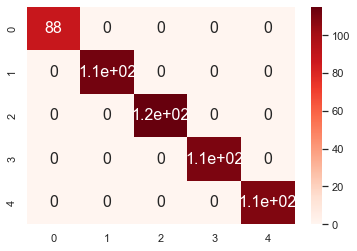

In [63]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
 
# Iniciar modelo

modelRF = RandomForestClassifier()

# Division de datos en conjunto de evaluación y entrenamiento
from sklearn.model_selection import train_test_split

dataTrain, data_test1, targetTrain, targetTest = train_test_split(data, target, random_state = 0)

# Entrenamiento

modelRF.fit(dataTrain, targetTrain)

# Predicción de modelo

targetPred = modelRF.predict(test)

# Resultados

array = confusion_matrix(targetPred, targetTest)

df_res = pd.DataFrame(array)

# Representación de la matriz

sn.set(font_scale =1)
plt.show(sn.heatmap(df_res, annot = True, annot_kws={'size':16}, cmap = 'Reds'))






In [64]:
targetPred

array([0, 2, 2, 3, 1, 3, 2, 2, 0, 3, 0, 2, 1, 4, 2, 2, 1, 3, 0, 0, 2, 4,
       0, 0, 2, 4, 2, 4, 3, 1, 1, 2, 1, 0, 4, 4, 4, 1, 3, 4, 3, 3, 3, 3,
       2, 2, 4, 3, 4, 1, 3, 1, 2, 3, 2, 2, 1, 0, 2, 3, 2, 3, 0, 4, 4, 1,
       2, 0, 1, 4, 1, 3, 2, 0, 1, 1, 2, 4, 4, 1, 0, 4, 3, 4, 0, 3, 0, 3,
       1, 1, 1, 3, 3, 0, 3, 2, 1, 4, 4, 3, 4, 2, 1, 0, 2, 2, 2, 0, 0, 4,
       0, 1, 0, 0, 0, 3, 4, 4, 3, 0, 0, 1, 1, 1, 3, 1, 3, 1, 0, 1, 3, 0,
       3, 4, 1, 4, 1, 0, 3, 0, 3, 1, 2, 3, 0, 3, 4, 1, 0, 3, 0, 0, 4, 4,
       2, 3, 3, 1, 3, 1, 0, 1, 1, 3, 1, 3, 0, 4, 2, 4, 0, 0, 3, 2, 0, 3,
       3, 3, 2, 1, 3, 1, 1, 1, 4, 0, 2, 0, 0, 1, 1, 1, 1, 1, 4, 2, 4, 2,
       2, 1, 4, 2, 4, 2, 4, 1, 4, 1, 1, 0, 3, 2, 0, 2, 1, 3, 2, 2, 3, 1,
       2, 4, 2, 4, 1, 1, 3, 4, 0, 2, 0, 3, 2, 4, 1, 2, 4, 4, 2, 3, 2, 3,
       2, 2, 3, 3, 3, 4, 3, 1, 2, 3, 1, 3, 3, 0, 2, 3, 2, 2, 3, 4, 4, 3,
       1, 3, 1, 2, 4, 4, 3, 0, 3, 4, 1, 4, 2, 3, 4, 0, 2, 1, 2, 2, 3, 0,
       3, 0, 3, 1, 0, 4, 2, 1, 1, 0, 4, 2, 1, 2, 1,

In [65]:
df_train_res = pd.DataFrame(targetPred)
df_train_res = df_train_res.rename(columns= {0 : 'Results'})

In [66]:
df_train_res

,Results
0,0
1,2
2,2
3,3
4,1
...,...
529,3
530,2
531,3
532,1


In [67]:
df_train_res.to_csv('data/predict_results.csv', sep=',', index=False)

In [70]:
dataTrain

,feature1,feature2,feature3,feature4,feature5,feature6,target
1759,-1.056559,-0.818858,0.027747,-1.213826,0.363277,-0.521809,1
1988,-1.343847,0.588080,1.292271,0.727626,0.970339,0.576621,3
1844,2.470066,-0.361244,0.701421,-1.390248,1.050561,0.594722,4
278,1.785138,2.362443,-1.053653,-1.458941,0.230629,-1.515487,4
1623,1.125606,1.769146,2.464309,-0.894201,2.887053,0.897174,4
...,...,...,...,...,...,...,...
1033,-0.892006,1.439997,-0.818899,-1.757583,0.395728,-1.912480,0
1731,-1.166307,0.396431,1.100572,0.785409,0.732409,0.586927,3
763,2.122564,2.602948,0.550566,-0.053792,1.066368,0.080172,2
835,-0.603296,-1.351841,-1.922849,1.251309,-2.484721,-0.403714,1


In [69]:
targetTrain

1759    1
1988    3
1844    4
278     4
1623    4
       ..
1033    0
1731    3
763     2
835     1
1653    4
Name: target, Length: 1599, dtype: int64

In [68]:
data_test1

,feature1,feature2,feature3,feature4,feature5,feature6,target
1968,-1.209888,-1.809712,-1.680704,0.388120,-2.009017,-0.637912,0
379,1.158074,-1.357518,-0.947393,1.132707,-1.635334,0.605275,2
689,-1.516371,0.720425,1.264246,0.624063,1.024754,0.430927,2
935,-1.289812,1.254919,1.011090,2.145903,0.288376,0.814657,3
252,-3.105564,1.776125,0.222635,-2.023774,1.527720,-2.059115,1
...,...,...,...,...,...,...,...
1769,-0.587955,-0.254792,0.225747,1.404253,-0.445252,0.656244,3
1845,1.000018,0.798971,1.756646,-2.339488,2.661123,0.111999,2
811,-1.205278,2.365292,0.985517,0.338440,1.287983,-0.277594,3
1319,-1.443320,-0.584030,-1.309617,-0.698016,-0.938580,-1.298763,1


In [1]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/Kike/opt/anaconda3/envs/Entorno_Virtual_BT_Data_Science/lib/python3.8/site-packages (1.0.1)
